In [80]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from kmodes.kmodes import KPrototypes

ImportError: cannot import name 'KPrototypes' from 'kmodes.kmodes' (C:\Users\franc\anaconda3\lib\site-packages\kmodes\kmodes.py)

# Customer Personality Analysis Dataset

Load dataset

In [39]:
df = pd.read_csv("./marketing_campaign.csv",delimiter="\t")
df.head()
df.drop(columns=["ID"], inplace=True)

In [67]:
df.info()
education = np.apply_along_axis(lambda x : "Education_"+x, axis=0, arr=df["Education"].unique())
marital_status = np.apply_along_axis(lambda x : "Marital_Status_"+x, axis=0, arr=df["Marital_Status"].unique())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2023 non-null   object 
 1   Marital_Status       2023 non-null   object 
 2   Income               2023 non-null   float64
 3   Kidhome              2023 non-null   int64  
 4   Teenhome             2023 non-null   int64  
 5   Recency              2023 non-null   int64  
 6   MntWines             2023 non-null   int64  
 7   MntFruits            2023 non-null   int64  
 8   MntMeatProducts      2023 non-null   int64  
 9   MntFishProducts      2023 non-null   int64  
 10  MntSweetProducts     2023 non-null   int64  
 11  MntGoldProds         2023 non-null   int64  
 12  NumDealsPurchases    2023 non-null   int64  
 13  NumWebPurchases      2023 non-null   int64  
 14  NumCatalogPurchases  2023 non-null   int64  
 15  NumStorePurchases    2023 non-null   i

In [41]:
#removing duplicates
df.drop_duplicates(inplace=True)

In [42]:
#removing column year of birth and creating a column age ( age of each person in the moment he/she enroll)
df["age"] = (df["Dt_Customer"].apply(lambda x : x.split("-")[2]).astype(int)).to_numpy()-df["Year_Birth"].to_numpy()
df.drop(columns=["Year_Birth", "Dt_Customer"], inplace=True)

The dataset has $2058$ fields. We have some missing values for the attribute "Income". We can keep them. We only remove when we consider the attribute income in our analysis.

In [43]:
df.dropna(inplace=True)

## Attributes

There are 29 attributes, we can divide them into 4 macro-categories: 
* People

    * ID: Customer's unique identifier
    * Year_Birth: Customer's birth year
    * Education: Customer's education level
    * Marital_Status: Customer's marital status
    * Income: Customer's yearly household income
    * Kidhome: Number of children in customer's household
    * Teenhome: Number of teenagers in customer's household
    * Dt_Customer: Date of customer's enrollment with the company
    * Recency: Number of days since customer's last purchase
    * Complain: 1 if customer complained in the last 2 years, 0 otherwise

* Products

    * MntWines: Amount spent on wine in last 2 years
    * MntFruits: Amount spent on fruits in last 2 years
    * MntMeatProducts: Amount spent on meat in last 2 years
    * MntFishProducts: Amount spent on fish in last 2 years
    * MntSweetProducts: Amount spent on sweets in last 2 years
    * MntGoldProds: Amount spent on gold in last 2 years

* Promotion

    * NumDealsPurchases: Number of purchases made with a discount
    * AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    * AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    * AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    * AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    * AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    * Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

* Place

    * NumWebPurchases: Number of purchases made through the company’s web site
    * NumCatalogPurchases: Number of purchases made using a catalogue
    * NumStorePurchases: Number of purchases made directly in stores
    * NumWebVisitsMonth: Number of visits to company’s web site in the last month

## Exploring data (people)

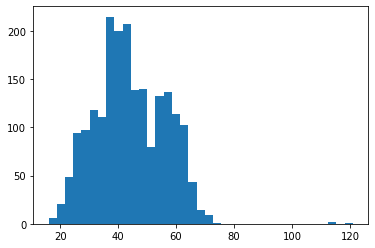

In [44]:
import matplotlib.pyplot as plt
plt.hist(df['age'],bins="auto");

There are two outliers: they are probably data entry errors (human errors while collecting data). We remove them.

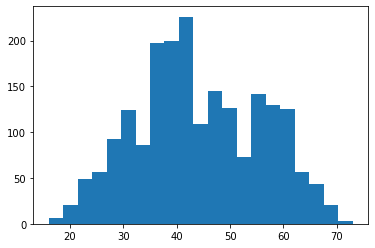

In [45]:
mask = df['age'] < 90
df = df[mask]
plt.hist(df['age'],bins="auto");

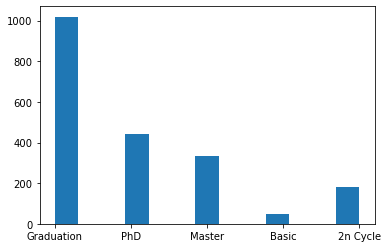

In [46]:
plt.hist(df['Education'],bins="auto");

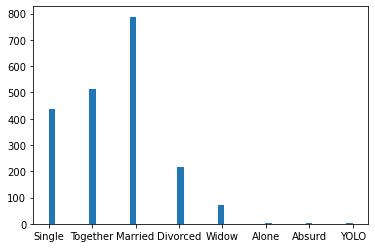

In [47]:
plt.hist(df['Marital_Status'],bins="auto");

From the histogram we can see strange values such as 'Alone', 'Absurd', 'YOLO', we assume that are human errors and we can remove them without affecting our analysis.

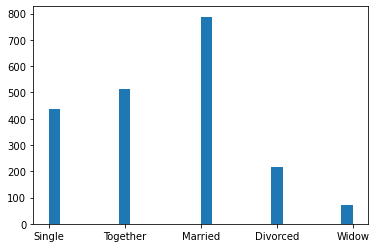

In [48]:
alone = df['Marital_Status'] == 'Alone'
df = df[~alone]
absurd = df['Marital_Status'] == 'Absurd'
df = df[~absurd]
yolo =  df['Marital_Status'] == 'YOLO'
df = df[~yolo]
plt.hist(df['Marital_Status'],bins="auto");

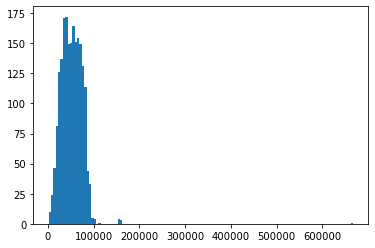

In [49]:
plt.hist(df['Income'],bins="auto");

There's one value with income = 666666, since it's an outlier and many algorithms are sensitive to outliers we remove it.

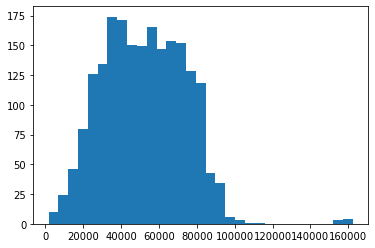

In [50]:
income = df['Income'] > 200000
df = df[~income]
plt.hist(df['Income'],bins="auto");

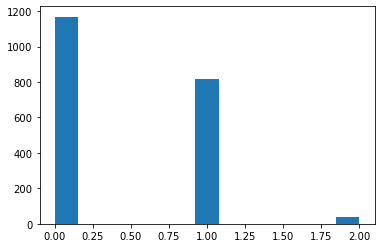

In [51]:
plt.hist(df['Kidhome'],bins="auto");

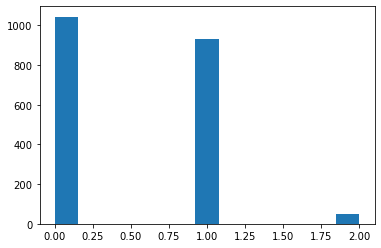

In [52]:
plt.hist(df['Teenhome'],bins="auto");

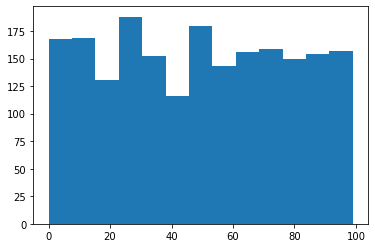

In [53]:
plt.hist(df['Recency'],bins="auto");

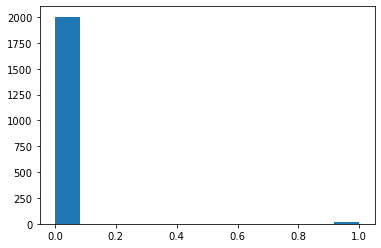

In [54]:
plt.hist(df['Complain'],bins="auto");

## Exploring data (Products)

Text(0, 0.5, 'freq')

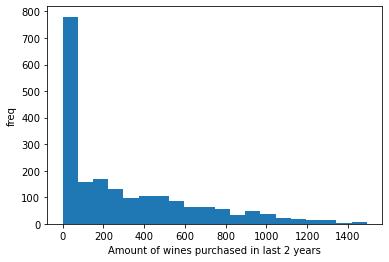

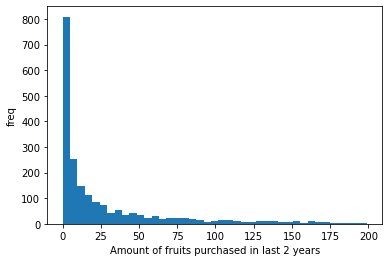

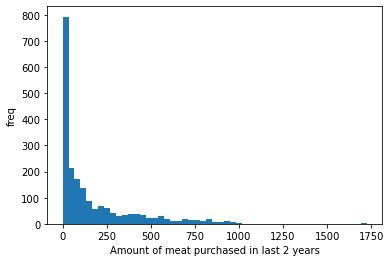

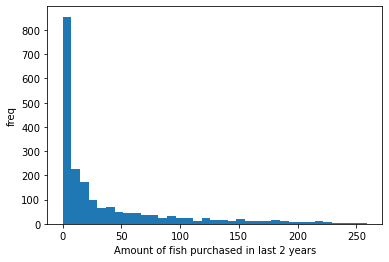

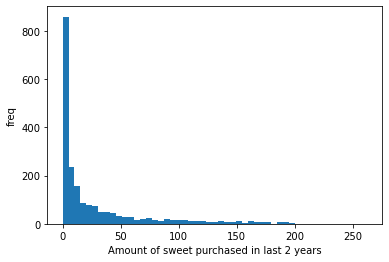

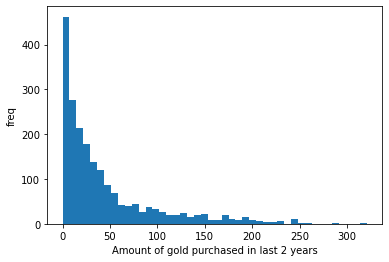

In [55]:
plt.figure(1)
plt.hist(df['MntWines'],bins="auto");
plt.xlabel("Amount of wines purchased in last 2 years")
plt.ylabel("freq")

plt.figure(2)
plt.hist(df['MntFruits'],bins="auto");
plt.xlabel("Amount of fruits purchased in last 2 years")
plt.ylabel("freq")

plt.figure(3)
plt.hist(df['MntMeatProducts'],bins="auto");
plt.xlabel("Amount of meat purchased in last 2 years")
plt.ylabel("freq")

plt.figure(4)
plt.hist(df['MntFishProducts'],bins="auto");
plt.xlabel("Amount of fish purchased in last 2 years")
plt.ylabel("freq")

plt.figure(5)
plt.hist(df['MntSweetProducts'],bins="auto");
plt.xlabel("Amount of sweet purchased in last 2 years")
plt.ylabel("freq")

plt.figure(6)
plt.hist(df['MntGoldProds'],bins="auto");
plt.xlabel("Amount of gold purchased in last 2 years")
plt.ylabel("freq")

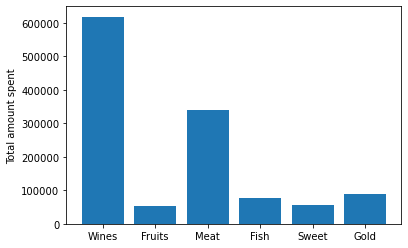

In [56]:
w = df['MntWines'].sum()
f = df['MntFruits'].sum()
m = df['MntMeatProducts'].sum()
fi = df['MntFishProducts'].sum()
s = df['MntSweetProducts'].sum()
g = df['MntGoldProds'].sum()
y = np.array([w,f,m,fi,s,g])
x = np.array(["Wines","Fruits","Meat","Fish","Sweet","Gold"])
plt.ylabel("Total amount spent")
plt.bar(x,y);

## Exploring data (Purchases)

Text(0, 0.5, 'freq')

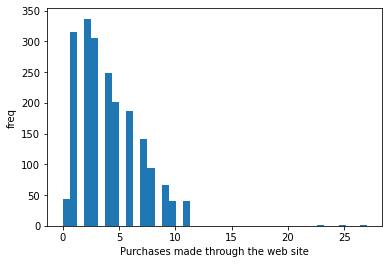

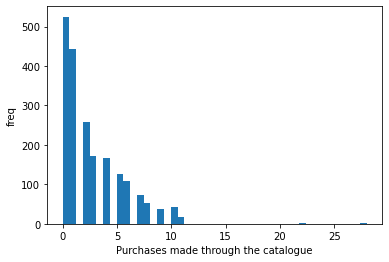

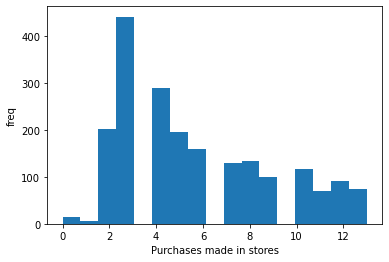

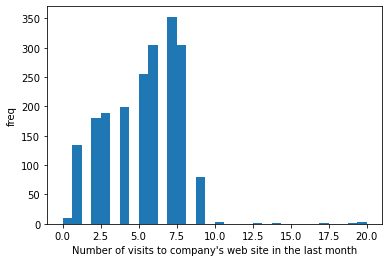

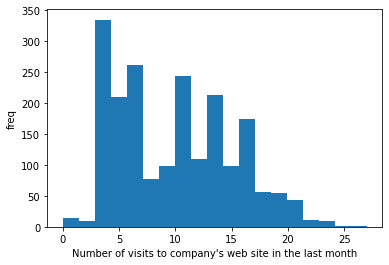

In [57]:
plt.figure(1)
plt.hist(df['NumWebPurchases'],bins="auto");
plt.xlabel("Purchases made through the web site")
plt.ylabel("freq")

plt.figure(2)
plt.hist(df['NumCatalogPurchases'],bins="auto");
plt.xlabel("Purchases made through the catalogue")
plt.ylabel("freq")

plt.figure(3)
plt.hist(df['NumStorePurchases'],bins="auto");
plt.xlabel("Purchases made in stores")
plt.ylabel("freq")

plt.figure(4)
plt.hist(df['NumWebVisitsMonth'],bins="auto");
plt.xlabel("Number of visits to company's web site in the last month")
plt.ylabel("freq")

plt.figure(5)
plt.hist((df['NumWebPurchases'].to_numpy()+df['NumStorePurchases'].to_numpy()),bins="auto");
plt.xlabel("Number of visits to company's web site in the last month")
plt.ylabel("freq")

<BarContainer object of 2 artists>

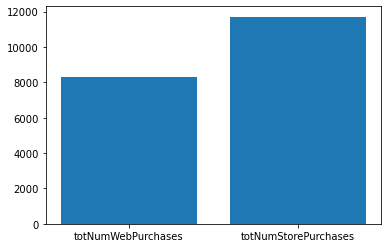

In [58]:
plt.bar(np.array(["totNumWebPurchases","totNumStorePurchases"]),np.array([df["NumWebPurchases"].sum(), df["NumStorePurchases"].sum()]))

## Preprocessing Data

In [59]:
df[df["Income"].isna()]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age


### Standard Scaler

In [60]:
columns_to_scale = ["Income","Kidhome", "Teenhome", "Recency", "MntWines", "MntFruits",
                  "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds",
                  "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth", "age"]
df_to_scale = df[columns_to_scale]

In [61]:
scaler = StandardScaler()
df_scale = pd.DataFrame(scaler.fit_transform(df_to_scale), columns = columns_to_scale)
df_scale.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age
0,0.282276,-0.826350,-0.931201,0.313400,0.975903,1.554520,1.666131,2.464957,1.462986,0.862602,0.343988,1.415762,2.495446,-0.552040,0.687328,0.928690
1,-0.263617,1.039393,0.899527,-0.376940,-0.872284,-0.636079,-0.713963,-0.647645,-0.630813,-0.731738,-0.173016,-1.124609,-0.569281,-1.168872,-0.133247,1.356396
2,0.905975,-0.826350,-0.931201,-0.791144,0.356879,0.572527,-0.180645,1.348082,-0.149480,-0.031784,-0.690021,1.415762,-0.228756,1.298459,-0.543535,0.329902
3,-1.175351,1.039393,-0.931201,-0.791144,-0.872284,-0.560541,-0.652257,-0.501170,-0.582679,-0.751181,-0.173016,-0.761699,-0.909807,-0.552040,0.277041,-1.209839
4,0.289450,1.039393,-0.931201,1.556012,-0.392466,0.421452,-0.220314,0.157970,-0.005080,-0.556749,1.377998,0.327032,0.111769,0.064793,-0.133247,-0.953215


In [62]:
columns = ["Education","Marital_Status"]
df_to_oh = df[columns]
df_oh = pd.get_dummies(df_to_oh).reset_index()

""" concatenate the standardized dataset and the one hot encoded dataset """
df_pp = pd.concat([df_scale, df_oh], axis=1)


## Models

### First try with 3 variables

In [88]:
sse = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit_transform(df_pp[["Income","MntWines", "age"]])
    sse += [model.inertia_]

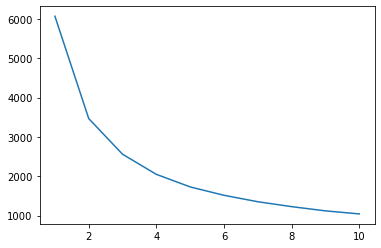

In [90]:
plt.plot([1,2,3,4,5,6,7,8,9,10], sse)

In [94]:
model = KMeans(n_clusters=3)
model.fit_transform(df_pp[["Income","MntWines", "age"]])
labels = model.predict(df_pp[["Income","MntWines","age"]])
df_labels = df_pp[["Income","MntWines","age"]]
df_labels["Label"] = labels

<ipython-input-94-4d4ab897e8c7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labels["Label"] = labels


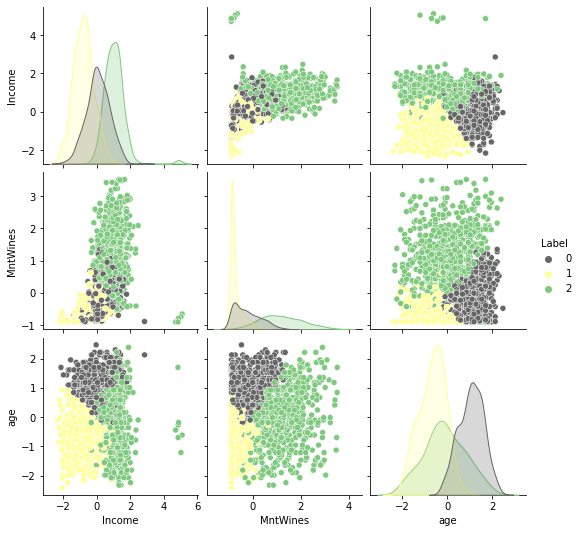

In [95]:
sns.pairplot(data = df_labels, hue="Label", palette="Accent_r")

In [68]:
model = KMeans(n_clusters=4)
columns_model = list(education)+list(marital_status)+["Income", "MntWines", "MntFishProducts", "MntMeatProducts"]
model.fit_transform(df_pp[columns_model])

array([[4.38849948, 2.56553711, 1.43724821, 3.36257746],
       [1.20584799, 4.07101696, 4.12375567, 2.20151557],
       [2.96123241, 2.7563688 , 1.8756412 , 1.89430852],
       ...,
       [3.09783485, 2.39973519, 3.17722182, 1.75575172],
       [2.7852671 , 2.45628496, 2.32120503, 1.67313843],
       [1.4684922 , 3.71052901, 3.9759865 , 1.84791168]])

In [70]:
labels = model.predict(df_pp[columns_model])
df_labels = df_pp[columns_model]
df_labels["Label"] = labels

<ipython-input-70-30eee6ee96f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_labels["Label"] = labels


C:\Users\franc\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\franc\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


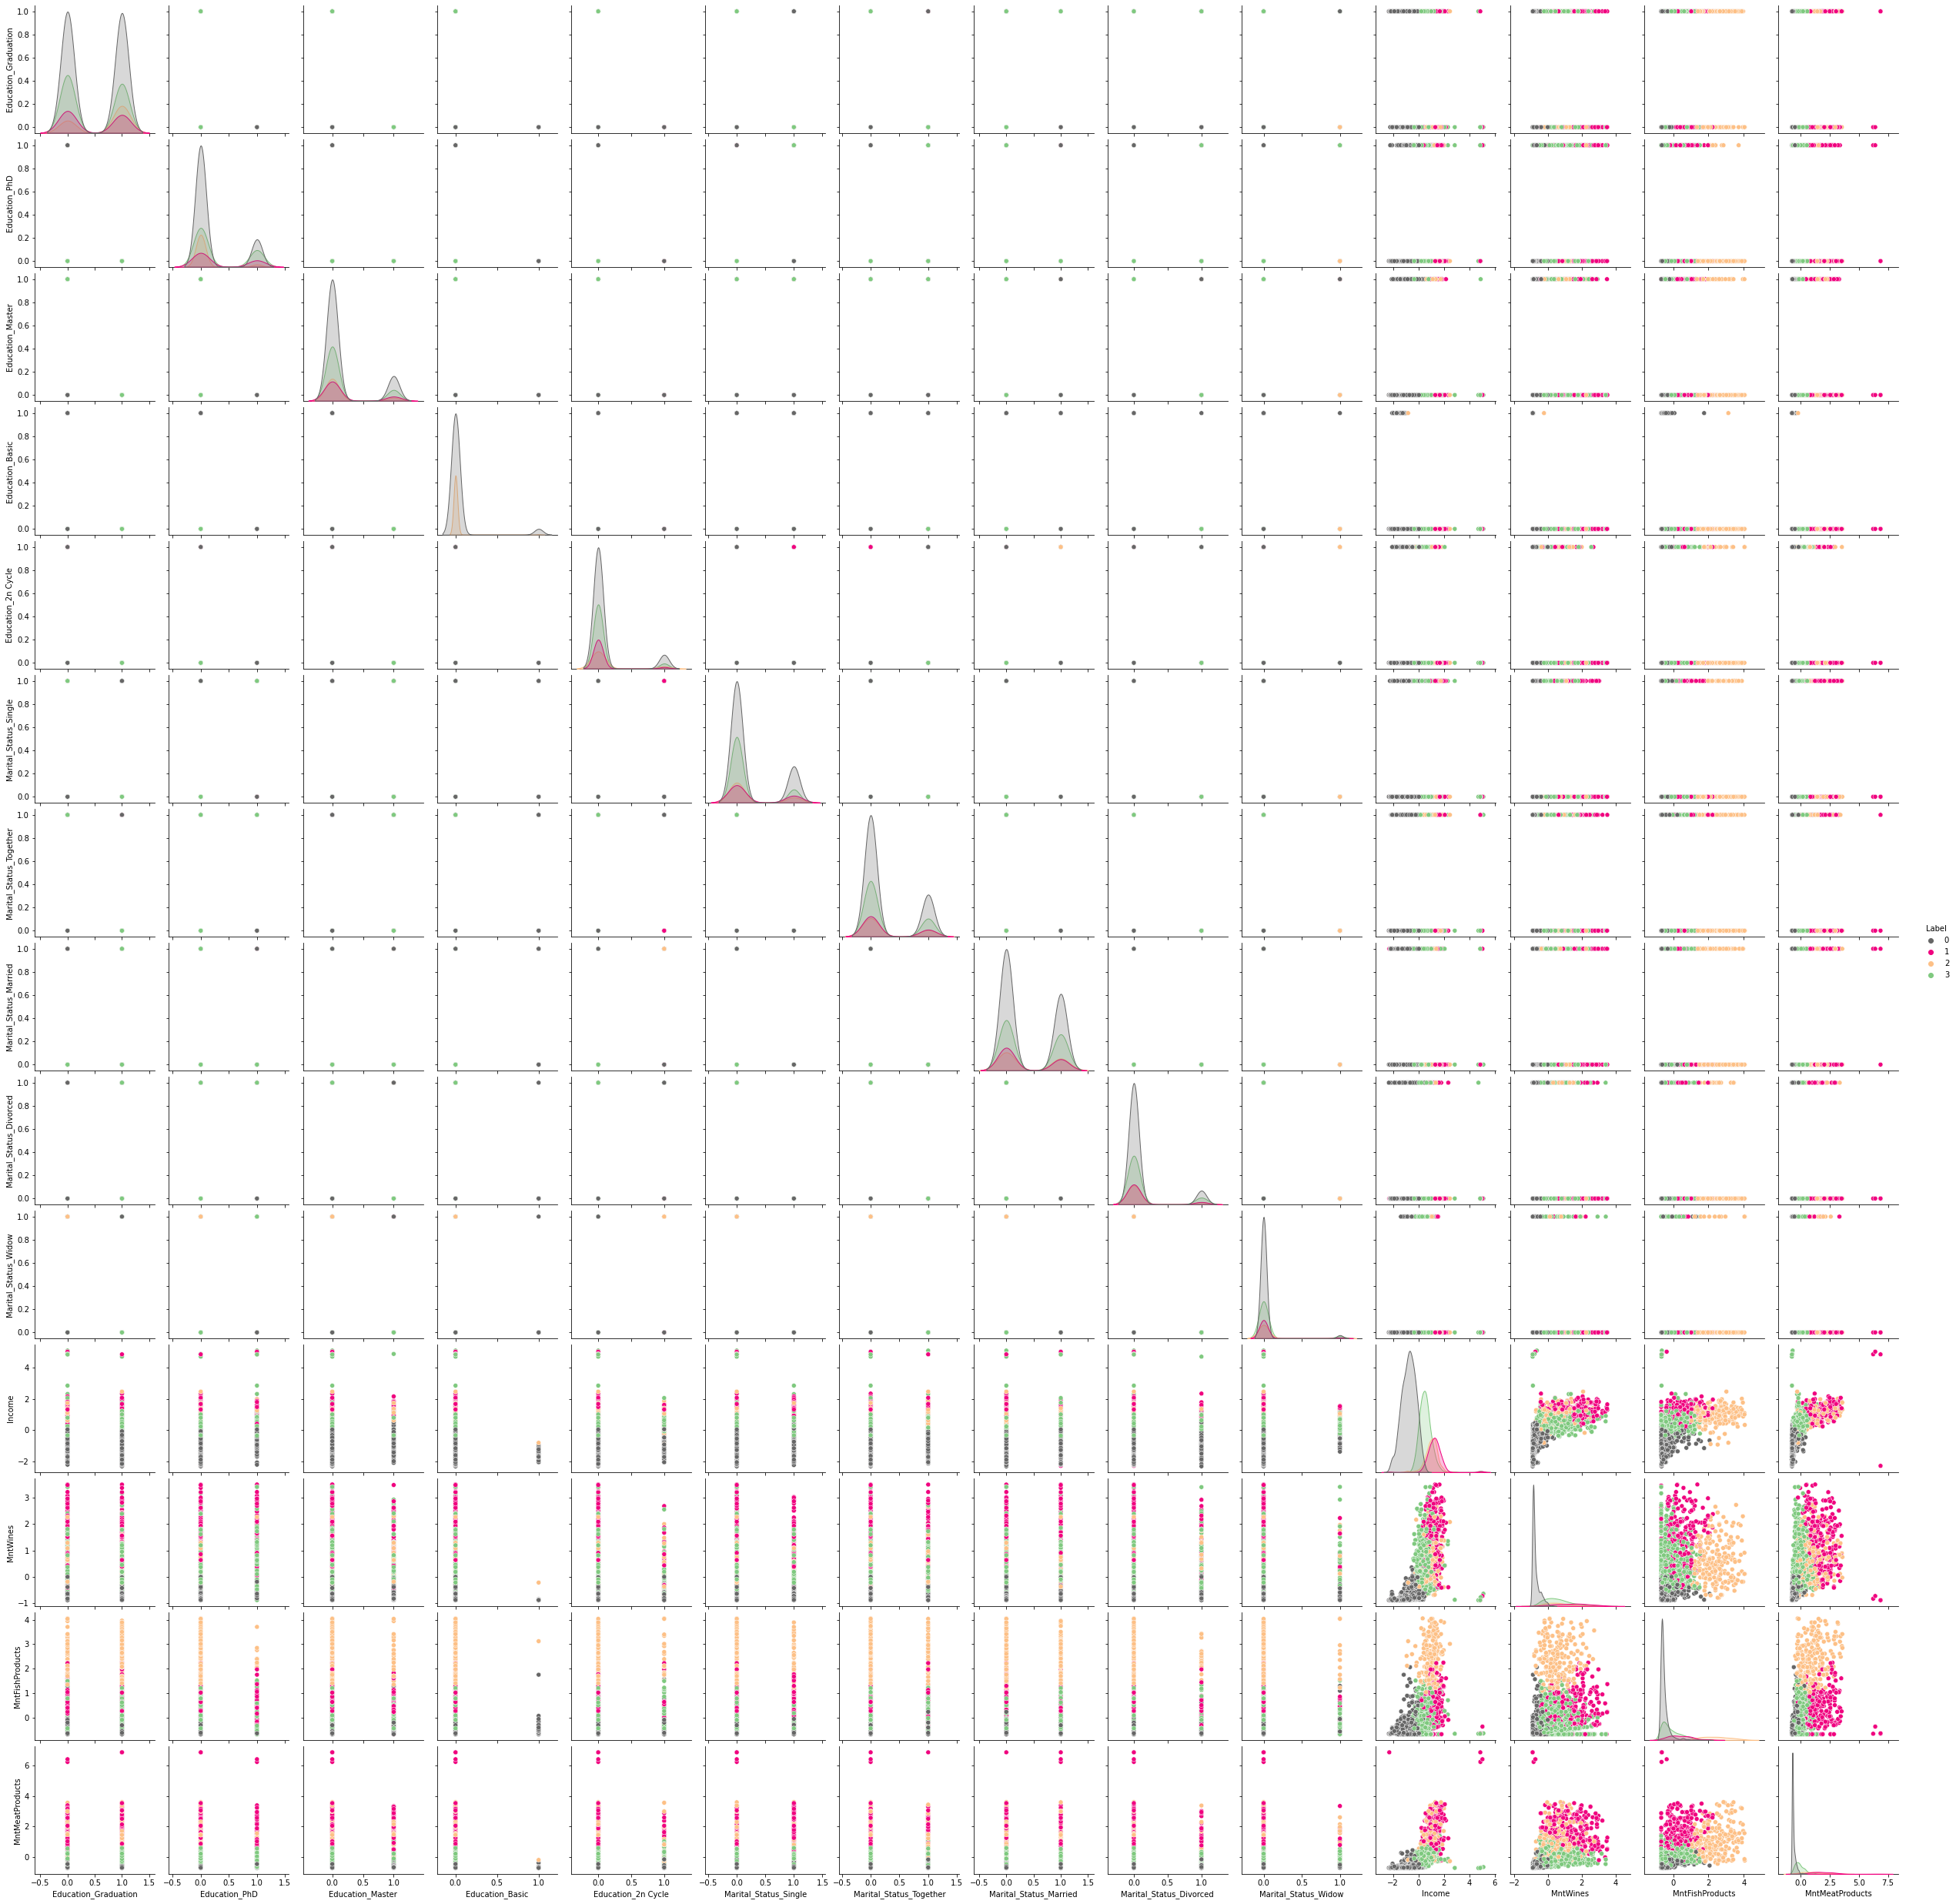

In [71]:
sns.pairplot(data = df_labels, hue="Label", palette="Accent_r")